In [1]:
import statsmodels.api as sm
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn.datasets import make_regression
from numpy import linalg as la

# Optimization

# 1. Basic optimization

- Prior to 1950 many people used maximization rather than minimization

`Model fitting:`
$$F(d_i, w) =  y_i \\ y_i= \text{label data} \\ \\ F= \text{model} \\ y_i = \text{label/outputs}$$

- Optimization problems usually use x for the unknown rather than $d_i$


`Linear model example:`

$$d^T_iw = b_i$$

`Loss function:`
- Sample data vectors d and labels y then measure the loss function

$$min \sum_i \ell(d_i, w, y_i$$

`Least-squares loss function:`
$$min ||D w- b||^2 \\ \ell (d_i, w, b_i) = (d^T_i w-b_i)^2$$

Where $d_i^T$ is rows of matrix d, then d*w is matrix vector product (inner product) minus $b_i$

`Penalized regressions: ridge penality`
$$min ||w||_2^2 + ||D w- b||^2$$

# 2. Eigenvalue decomposition in optimization
- Eigvalues values show the correct basis
- Action of a matrix is described by eigenvalues


$$A=UDU^{-1}$$

### Python example of decomposition

In [2]:
A = np.random.randint(20, size=(3,3))
A

array([[14,  6, 13],
       [ 1,  5,  4],
       [ 8, 10,  4]])

In [3]:
values, vectors = np.linalg.eig(A)
U = vectors
U_inv = np.linalg.inv(vectors)
D = np.diag(values)
eigen = U@D@U_inv
print(np.real(np.round(eigen,2)))

[[14.  6. 13.]
 [ 1.  5.  4.]
 [ 8. 10.  4.]]


**Example of eigenvalue decomposition in optimization:**
$$x = \beta_1 e_1 + \beta_2 e_2 \\
Ax =  A(\beta_1 e_1 + \beta_2 e_2) \\
= A\beta_1e_1 + A\beta_2 e_2 $$

Mulitply A by eigenvector = eigenvalue eigenvalue
$$= \beta_1 \lambda_1 e_1 + \beta_2 \lambda_2 e_2 \tag{2.1}$$

**Inverse of 2.1**
$\beta_1 \lambda_1^{-1} e_1 + \beta_2 \lambda_2^{-1} e_2 \tag{2.2}$

## 2.1. Eigenvalue review

Using slightly different notation:

$$AV= c IV$$

Where:
- c = eigenvalue
- IV = eigenvector

Rearranged:

$$AV- c IV = 0 \\
(A-c I)V=0$$
Where A-cI is called the characteristic matrix of A

- With |A-c I|=0 there is infinite solutions.
- Thus to find a uniqaue solution we must normalize by requiring the elements of $v_i$ of V so that $\sum v_i^2=1$

Matrix A is:

1. Positive definte $\Rightarrow$ eigenvalues>0 
- Negative definite $\Rightarrow$ eigenvalues<0
- Postive semi-definite $\Rightarrow$ all eigenvalues are nonnegative and at least one=0 
- Negative semi-definite $\Rightarrow$  all eigenvalues are nonpositive and at least one=0 
- Indefinite $\Rightarrow$ some eigenvalues>0 and some <0

### 2.1.1 Finding eigenvalues:

$$Det|A-cI| =0$$

#### 2.1.1.1 Python example: Eigenvalue with numpy

- Using np.linalg.eig(MATRIX)

In [4]:
A = np.array([[-6,3],[3,-6]])
np.linalg.eig(A)[0]

array([-3., -9.])

#### 2.1.1.2 Python example: Eigenvalue with user defined function

In [5]:
def eigen(matrix):
    A = np.diag(matrix) #Diagonal
    I = np.diag(np.fliplr(matrix)) #Opposite Diagonal
    #Quadratic equation
    c = np.prod(A)-np.prod(I) #C-term 
    b = -np.sum(A) #B-term
    root_term = math.sqrt(b**2-4*(c))#Quadrtic formula root term
    solu1 = (-(b)+root_term)/2 #Quadratic formula solution1
    solu2 = ((-b)-root_term)/2 #Quadratic formula solution2
    vec1 = matrix-np.diag(np.repeat(solu1,2))
    vec2 = matrix-np.diag(np.repeat(solu2,2))
    print("Original matrix: \n",matrix)
    print("Eigen-values: {}, {}\n".format(round(solu1,3),round(solu2,3)))
    #Classification of matrix
    if solu1>0 and solu2>0:
        print('Pos definite')
    if solu1<0 and solu2<0:
        print('Neg definite')
    if (solu1==0 or solu2==0) and (solu1>0 and solu2>0):
        print('Pos semi-def')
    if (solu1==0 or solu2==0) and (solu1<0 and solu2<0):
        print('Pos semi-def')
    if (solu1<0 and solu2>0) or (solu1>0 and solu2<0):
        print('Indefinite')

In [6]:
A = np.random.randint(5, size=(2,2))
eigen(A)

Original matrix: 
 [[4 1]
 [1 2]]
Eigen-values: 4.414, 1.586

Pos definite


## 2.2 Estimation problem

Suppose:

$$\lambda_1 =1, \ \lambda_2=0.1, \ \lambda_3 = 0.01 \\
Ax = b= \beta_1 e_1 +0.1\beta_2 e_2 +0.01 \beta_3 e_3 \\
\hat{b} = b + \eta$$

$\eta$, noise, would show up at every frequency uniformly

Example of adding random Guassian 2-d noise with no directionality at 0.02

$$AX = \beta_1 1.02 +\beta_2 0.12+0.03 \beta_3 $$
Inversion would blow up the matrix

**This issue crops up all the time**


# 3. Condition number

`Condition number:` Ratio of smallest to largest singular value

$$\kappa = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}} \\
\kappa = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}}
\\ \kappa = ||A||||A||^{-1}
$$
- A measure of how good you matrix is
- Singular values are always positive
- $\lambda$ is for the symmetric matrix
- The condition number tells you how much you matrix will react to additional noise
- This a higher condition number will negatively impact convolutions, linear operators, etc
- The condition number for a convolution is usually very large
    - This is a problem for images
    - Radar and sonar systems are designed to have low condition numbers

## 3.1 Python examples: Condition number

### 3.1.1 Python example: Condition number blows up the noise
From CMSC 764 hmwk2 

In [7]:
def condition_blowup(n):
    A = sp.linalg.hilbert(n)# construct an n by n matrix
    x = np.random.randn(n,1)# construct n by 1 signal 
    b = A@x 
    x_recovered = la.inv(A)@b #Can also use la.solve(A,b) 
    # 1. Recovering X: inverting A dot b 
    print('1. Recovery error with no noise = {:0.3}'.format(la.norm(x_recovered-x)))
    
    # 2.1 Now add small amount of noise to vector b
    b_noise = b+np.random.randn(n,1)*0.0000001
    # 2.2 The error blows up when we try to recover X
    x_recovered_withnoise = la.inv(A)@b_noise
    print('2. Recovery error with noise of {:.03} = {:.03f}'.format(la.norm(b_noise-b), la.norm(x_recovered_withnoise-x)))
    
np.random.seed(0)
condition_blowup(8)

1. Recovery error with no noise = 1.63e-06
2. Recovery error with noise of 1.79e-07 = 178.930


### 3.1.2 Python example: Function that returns Mxn matrix with specific condition number

In [8]:
import numpy as np
def buildmat(m,n,condition_number):
    A = np.random.randint(10, size=(m,n))
    print("The {}x{} matrix A with condition number={}:\n{}".format(m,n, condition_number,A))
    #print("Np.linalg.cond",np.linalg.cond(A))
    U, S, V = np.linalg.svd(A)
    S = np.array([[S[j] if i==j else 0 for j in range(n)] for i in range(m)]) #Creates diagnoal matrix with S entries
    S[S!=0]= np.linspace(condition_number,1,min(m,n)) #Creates matrix with condition number in 1,1
    A = U@S@V
    print("Constructed matrix which will yield a condtion number={}".format(A, condition_number))
m,n,condNumber = 2,2,2

np.random.seed(100)
buildmat(m,n,condNumber)
print(np.linalg.cond(A),"\n")

The 2x2 matrix A with condition number=2:
[[8 8]
 [3 7]]
Constructed matrix which will yield a condtion number=[[1.46829282 0.97228825]
 [0.02360495 1.37775707]]
2.783611624891225 



## 3.2 Deblurring

- Blur with linear operator then invert to get back
- Now blur with 2-d convolution



### 3.1.2 Python example: Deblurring

- Blur with linear operator then take inverse to recover the image
- If there is noise then you will be unable to recover the image


# 4. Under-determined systems

What if a matrix the matrix is not full-rank? 

$$A \in R^{MxN}, \ \ M<N \\
b= Ax + \eta$$



If the error is bounded $||\eta||<\varepsilon$ solve:

$$\text{Min} ||x|| s.j.t. \ \ ||Ax-b||\leq \varepsilon$$

- If noise is bounded then finding the simplist solution that satisfies the following constraint
- Finds the shortest vector min 2-norm subject to constraint



## 4.1 Geometric interpretation

- If two norm is too small there is no solution
- 2-norm ball is tangent to the plane defined by the linear system
- Picking different balls for constrain changes where the ball intersects line

<img src='Images/l2_4.1_geometric.png'>

# 5. Ridge regression

- Ridge regression solves linear system with 2-norm penalty

If the error is bounded $(||\eta||\leq \varepsilon)$ 

$$b= Ax+\eta$$

$$Min ||x|| s.j.t ||Ax-b||\leq \varepsilon$$

This is equivalent to:

$$Min \ \ \lambda||x||^2 +||Ax-b||^2$$

- As $\lambda \uparrow error \uparrow$
- If $\lambda=0$ then it is linear

One way to analyze ridge penalty is to look at what at it does to the condition number of the system
- The solution is a lot less noise sensative

The new condition number:

$$\frac{\sigma^2_{\text{max}}+\lambda}{\sigma^2_{\text{min}}+\lambda}$$



## 5.1 Thihonov regularization

- Anything that involves a smooth l-2 penalty
- Easy to solve these linear systems
    - Convex
    - Smooth

- Improved condition number, less noise sensitivity
- Parameter $\lambda$ can be set in two ways:
    1. Empirically
    2. Use noise bounds and theory (BIC, etc)

## 5.2 Bayesian model for ridge regression

### 5.2.1 Bayes rule review

$$P(H|E) = P(\text{Hypothesis}) \cdot \frac{P(\text{Evidence}|\text{Hypothesis})}{\text{Evidence}} $$


#### 5.2.1.1 Example: Baye's theorem

#### The Cookie problem:

- Bowl 1: 30 vanilla, 10 chocolate
- Bowl 2: 20 vanilla, 20 chocolate

**Suppose we randomly draw a vanilla cookie. What is the probability it came from bowl 1?**

- This answer would be straightforward IF the question was P(Vanilla|Bowl 1).
   - 3/4 because 30/40 cookies are vanilla in bowl one
   
Instead the answer can be found using Bayes

$$P(\text{Bowl 1}|\text{Vanilla})= \frac{p(B_1)p(V|B_1)}{p(V)}\\
= \frac{1/2\cdot3/4}{5/8}\\
=.6$$




## 5.2.2 Bayes in ridge

1. Choose distribution of data given parameters
2. Observe data from random process
3. Use Bayes rules
4. Find most likely parameters given data
5. Uncertainty qunatification and confidence


$$Min \ \ \lambda||x||^2 +||Ax-b||^2$$

Assumptions:
- Prior: Expected signal power: $E\{x^2_i\}=E^2$
- Linear measurement model: $b=Ax+\eta$
- Noise is i.i.d Gaussian: $eta = . N(0,\sigma)$
- MAP (maximum a-posteriori) estimate: $P(x|b)$


**Bayes' rule**
$$P(X|Y) \propto P(X|Y)\times P(X)$$

$$Max x P(x|b) \propto p(b|x)p(x)$$
- Unknown parameter is x
- Model: $b \sim N(Ax, \sigma)$
- Prior: $x \sim N(0, E)$


Probability of data:
$$P(b|X) = \prod_i \frac{1}{\sigma \sqrt{2\pi}}e ^{-\frac{1}{2\sigma^2}(b_i-(Ax)_i)^2} \\ 
= (2\pi\sigma^2)^{{-m/2}} e ^{-\frac{1}{2\sigma^2}||b_i-Ax||^2}
$$

Prior:
$$P(x) = (2\pi E^2)^{-n/2} e^{-1\frac{1}{2E^2}}||x||^2$$


Max: 

$$Exp(\frac{-||b-Ax||^2}{2\sigma^2})exp(\frac{-||x||^2}{2E^2})$$

- Ignore all the constants, we are trying to find the x that maximizes

Negative Log-Likelihood

$$-\frac{||b-Ax||^2}{2\sigma^2}-\frac{||x||^2}{2E^2}$$

Multiply by -1 to make into minimization problem

$$\frac{\sigma^2}{E^2}||x||^2+||b-Ax||^2$$

- $\lambda = \frac{\sigma^2}{E^2}$
    - $\sigma$ = noise
    - E = expected value of signal
    - If we have more noise then the larger the $\lambda$


## 5.2.3 Priors

- Priors can add information
- Ridge/Tikhonov priors require many assumptions
- One general prior is sparsity
- Usually we want weaker priors so our model doesn't break if we are wrong
- Spare priors are often used

### 5.2.3.1 Sparse priors

- Signal has very few non-zeros: small $\ell_0$ norm
- Low density signals have a rapid decay of coefficients
- Fast decay: small and weak $\ell_p$ norm

# 6. Overfitting

- Sparsity used a lot in machine learning
- Try to do signal estimation on high-dimensional vectors without over-fitting


$$Ax = b$$
- Features/data=A
- Model parameters= x
- Labels = b

## 6.1 Python example: Overfitting

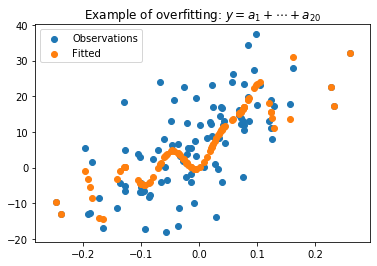

In [9]:
from sklearn.datasets import make_regression
np.random.seed(1)
x, y = make_regression(n_samples=100, n_features=1, noise=10,effective_rank=1, bias=5)
x = pd.DataFrame(x)
# Create polynomial model
for i in range(0,20):
    x['x'+str(i)] = x.iloc[:,[0]]**i
x=x.drop(0, axis=1)
results = sm.OLS(y, x.iloc[:, 1:]).fit()
plt.scatter(x['x1'],y)
plt.scatter(x.x1, results.predict())
plt.title(r'Example of overfitting: $y=a_1+\cdots+a_{20}$')
plt.legend(['Observations','Fitted'])
plt.show()

## 6.2 Overfitting & condition number

**A large condition number $\rightarrow$ risk of overfitting**

- When the condition number is big you will likely overfit if there is any type of noise or rounding error.


- The rounding error blows up when inverting matrixs


- If the condition number is very big and you start solving the linear system by row elimination you a little rounding error which become part of the solution.


- The condition number to a linear system is usually large so the errors explode


- If you start solving the system you are accumulating the rounding errors, and when you invert the system this blows up the error


- If you have a well conditioned problem then it is difficult to overfit because the X has weak dependence on the noise

## 6.2.1 Python example: Overfitting & condition number

Condition number: 9.285999564131141e+17


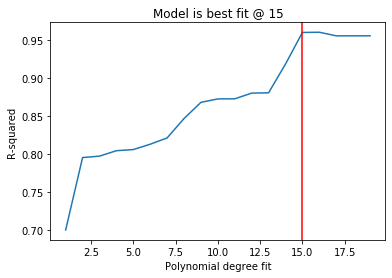

In [10]:
np.random.seed(1)
x, y = make_regression(n_samples=20, n_features=1, noise=10,effective_rank=1, bias=5)
x = pd.DataFrame(x)
# Create polynomial model

rsq = np.zeros(20)
degree = np.arange(1,20)
for i in degree:
    x['x'+str(i)] = x.iloc[:,[0]]**i
    results = sm.OLS(y, x.iloc[:, 1:]).fit()
    rsq[i] = results.rsquared

    
print('Condition number: {}'.format(la.cond(x,2)))
ax = plt.plot(degree, rsq[1:])
plt.ylabel('R-squared')
plt.xlabel('Polynomial degree fit')
#Find the polynomial when r-squared decreases
for idx,i in enumerate(np.diff(rsq[1:], axis=0)):
    if i<0:
        plt.axvline(idx, color='red')
        plt.title('Model is best fit @ '+str(idx))



## 6.3 Spare recovery problems

**Used to control over-fitting**


Usually used when matrix is fat (M>N)

$$Min ||x||_0 \ \ s.j.t \ \ AX=b$$
- $||x||_0$ = sparse solution
- AX = Fat matrix (underdetermined)
- b = dense measurements


The problem is that L-0 is not convex but we can find a solution

### 6.3.1 Convex relaxation

Keep trying larger norms until it touches the plane

<img src='Images/l2_6.4_Convex_relaxation.png'>

#### 6.3.1.1 Python example: Convex relaxation

## 6.4 Sparse optimization problems

`Basic Pursuit:`
- Min 1-L solution
$$Min |x| \ \ s.j.t \ \ Ax=b$$

`Basic Pursuit Denoising:`
- 2-L with L-1 penalty
- Sometimes also called Lasso

$$Min \lambda|x|+ \frac{1}{2} ||Ax=b||^2$$

`Lasso:`
- 2-L with 
$$Min \frac{1}{2} ||Ax=b||^2\ \ s.j.t \ \ |x|\leq \lambda$$


### 6.4.1 Sparse optimization with Bayes

Basic Pursuit Denoising:

$$\lambda|x|+ \frac{1}{2} ||Ax=b||^2$$



- The smaller the $\lambda$ the denser the solution
- The larger the $\lambda$ the sparser the solution



Prior is often Laplace distribution which is more robust to outliers




`Laplace distribution:`

$$P(x) = e^{-|x|}$$

`Laplace PDF:`
$$f(x; \mu, \lambda)= \frac{1}{2\lambda}\exp(-\frac{|x - \mu|}{\lambda})$$

#### 6.4.1. Python example: Laplace vs. Gauss

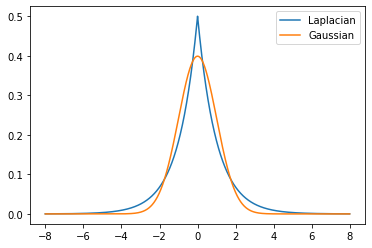

In [11]:
loc, scale = 0, 1
laplace = np.random.laplace(loc, scale, 1000)
x = np.arange(-8., 8., .01)
laplace_pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, laplace_pdf, label='Laplacian')
gaussian_pdf = (1/(scale * np.sqrt(2 * np.pi)) *
     np.exp(-(x - loc)**2 / (2 * scale**2)))
plt.plot(x,gaussian_pdf, label='Gaussian')
plt.legend()
plt.show()

### 6.4.2 Sparse optimization with Cross validation

- K-fold CV
- Leave-one-out CV
- Random sampling CV

Most straightforward CV is train vs. test
- Fitting with different $\lambda$

<img src= 'Images/l2_6.4.2_Sparse optimization.png'>



## 6.5 After model selection

## 6.5.1 Co-sparsity

$$\lambda|\phi x|+ \frac{1}{2} ||Ax=b||^2$$
Where $\phi$ is some transformation

- Sometimes signal is sparse under a transform

